In [1]:
import random,datetime,functools,operator

In [2]:
geneset = [i +1 for i in range(10)]

In [13]:
class Fitness:
    def __init__(self, group1Sum, group2Product):
        self.Group1Sum = group1Sum
        self.Group2Product = group2Product
        sumDifference = abs(36 - group1Sum)
        productDifference = abs(360 - group2Product)
        self.TotalDifference = sumDifference + productDifference

    def __gt__(self, other):
        return self.TotalDifference < other.TotalDifference

    def __eq__(self,other):
        return self.TotalDifference == other.TotalDifference

    def __str__(self):
        return "sum: {} prod: {}".format(self.Group1Sum,
            self.Group2Product)

In [14]:
def get_fitness(genes):
    group1Sum = sum(genes[0:5])
    group2Product = functools.reduce(operator.mul, genes[5:10])
    return Fitness(group1Sum, group2Product)

In [15]:
def display(candidate, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print("{} - {}\t{}\t{}".format(
        ', '.join(map(str, candidate.Genes[0:5])),
        ', '.join(map(str, candidate.Genes[5:10])),
        candidate.Fitness,
        timeDiff))

In [16]:
class Chromosome:
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness

In [90]:
def mutate(parent, geneset):
    genes = parent.Genes[:]
    for i in range(4):
        indexA, indexB = random.sample(range(len(genes)), 2)
        genes[indexA], genes[indexB] = genes[indexB], genes[indexA]
    fitness = get_fitness(genes)
    return Chromosome(genes, fitness)

In [91]:
def get_best():
    startTime = datetime.datetime.now()
    optimalFitness = Fitness(36, 360)
    best = Chromosome(geneset, get_fitness(geneset))
    if best.Fitness == optimalFitness:
        return best
    num = 0
    while True:
        num +=1
        child = mutate(best,geneset)
        if best.Fitness > child.Fitness:
            continue
        display(child,startTime)
        if not child.Fitness > best.Fitness:
            best = child
        if child.Fitness == optimalFitness:
            break
        best = child
    return (best,num)

In [92]:
b= get_best()

In [93]:
n = []
for i in range(100):
    n.append(get_best()[1]) 

In [94]:
import matplotlib.pyplot as plt

(array([32., 20., 11.,  9., 10.,  7.,  4.,  4.,  1.,  2.]),
 array([   4. ,  225.6,  447.2,  668.8,  890.4, 1112. , 1333.6, 1555.2,
        1776.8, 1998.4, 2220. ]),
 <a list of 10 Patch objects>)

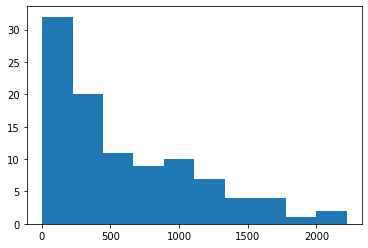

In [95]:
plt.hist(n)

In [96]:
import numpy

In [97]:
numpy.mean(n)

585.51